<a href="https://colab.research.google.com/github/vijipandian/project/blob/main/Retail_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv(r"/content/retail_sales_dataset.csv")
data

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150


In [4]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [3]:
#describe
data.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [5]:
#nullvalues
data.isnull().sum()

,0
Transaction ID,0
Date,0
Customer ID,0
Gender,0
Age,0
Product Category,0
Quantity,0
Price per Unit,0
Total Amount,0


In [6]:
#show the columns
data.columns

Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')

In [7]:
#groupby function for product category & quantity
data.groupby('Product Category')['Quantity'].sum()

,Quantity
Product Category,
Beauty,771
Clothing,894
Electronics,849


In [8]:
#groupby function for gender vs age.
data.groupby('Gender')['Age'].sum()

,Age
Gender,
Female,21092
Male,20300


In [9]:
#age
data[data.Age<20].head(5)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
15,16,2023-02-17,CUST016,Male,19,Clothing,3,500,1500
21,22,2023-10-15,CUST022,Male,18,Clothing,2,50,100
36,37,2023-05-23,CUST037,Female,18,Beauty,3,25,75
57,58,2023-11-13,CUST058,Male,18,Clothing,4,300,1200
61,62,2023-12-27,CUST062,Male,18,Beauty,2,50,100


In [10]:
#unique values
data['Quantity'].unique()

array([3, 2, 1, 4])

In [11]:
#quantity values counts.
data['Quantity'].value_counts()

,count
Quantity,
4,263
1,253
2,243
3,241


<Axes: ylabel='Frequency'>

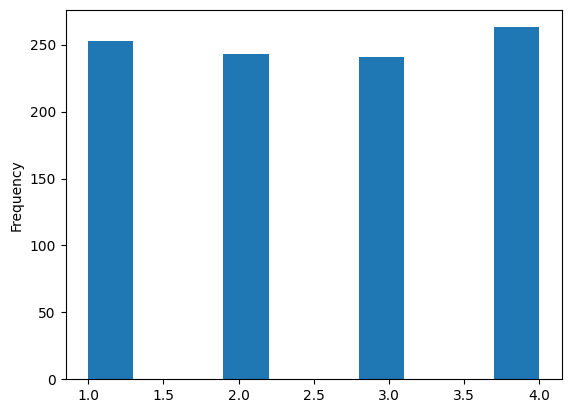

In [12]:
#frequency value in quantity.
data['Quantity'].plot(kind='hist')

In [14]:
#unique
data['Total Amount'].unique()

array([ 150, 1000,   30,  500,  100,   50,  600,  200,   75, 1500,  120,
       2000,  900,  300, 1200,   90,   25,   60])

In [13]:
#total amount value  counts
data['Total Amount'].value_counts()

,count
Total Amount,
50,115
100,108
200,62
900,62
1200,54
25,51
30,51
500,51
1500,50


In [15]:
#product category value counts.
data['Product Category'].value_counts()

,count
Product Category,
Clothing,351
Electronics,342
Beauty,307


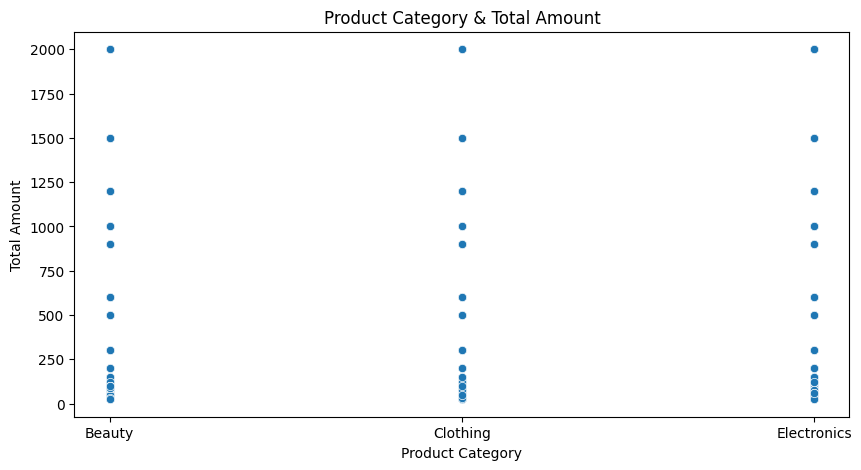

In [16]:
#scatterplot - product category vs total amount.
plt.figure(figsize=(10,5))
sns.scatterplot(x='Product Category',y='Total Amount',data=data)
plt.title("Product Category & Total Amount")
plt.xlabel("Product Category")
plt.ylabel("Total Amount")
plt.show()

<Axes: ylabel='count'>

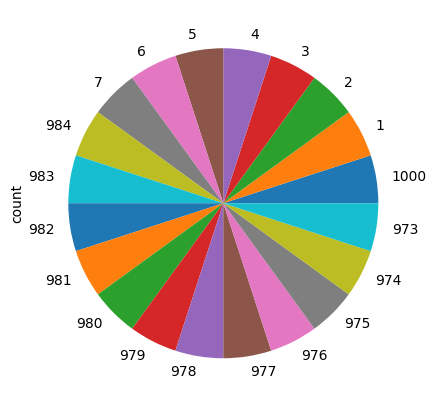

In [17]:
#pie chat - Transcation ID
data['Transaction ID'].value_counts().head(20).plot(kind='pie',figsize=(5,6))

<Axes: xlabel='Price per Unit'>

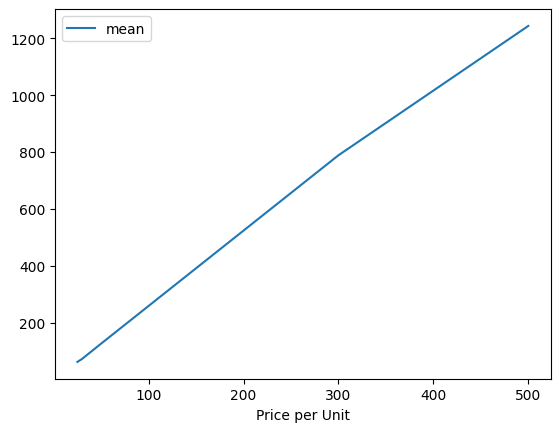

In [18]:
#mean value - price per unit vs total amount.
data.groupby('Price per Unit')['Total Amount'].agg(['mean']).plot()

In [19]:
#age value counts.
data['Age'].value_counts()

,count
Age,
64,31
43,31
51,30
57,30
54,28
34,28
22,27
62,27
42,26


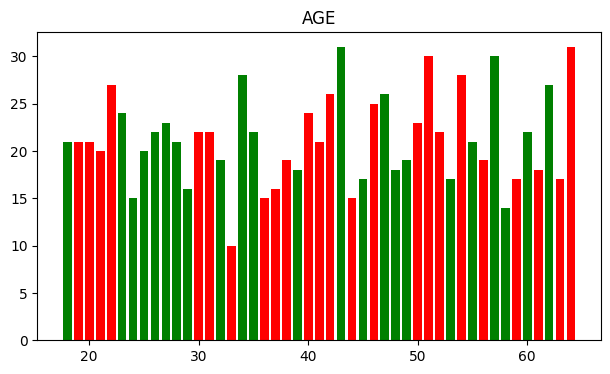

In [20]:
#bar plt - age
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
plt.bar(data['Age'].value_counts().index, data['Age'].value_counts().values,color=['r','g'])
plt.title("AGE")
plt.show()

Text(0.5, 1.0, 'Gender & Product Category ')

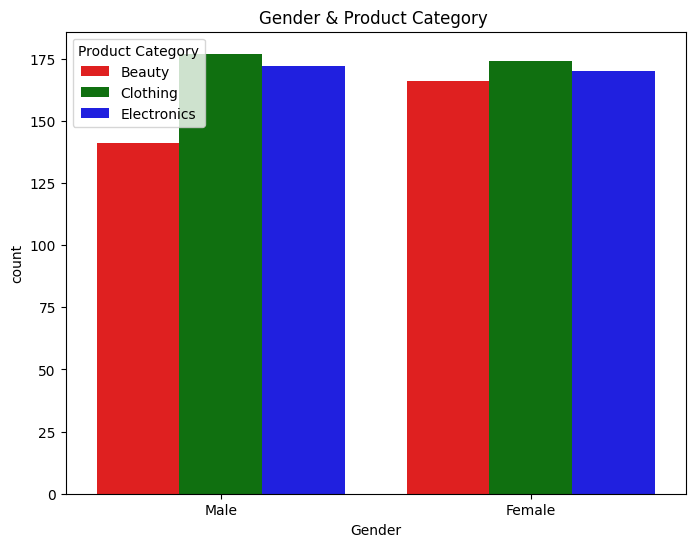

In [21]:
#countplt -  gender vs product category
plt.figure(figsize=(8,6))
sns.countplot(data=data, x="Gender",hue="Product Category",palette=['red','green','blue'])
plt.title("Gender & Product Category ")

In [22]:
#date value counts.
data['Date'].value_counts()

,count
Date,
2023-05-16,11
2023-07-14,10
2023-05-23,9
2023-02-05,8
2023-08-05,8
...,...
2023-03-02,1
2023-08-02,1
2023-04-17,1


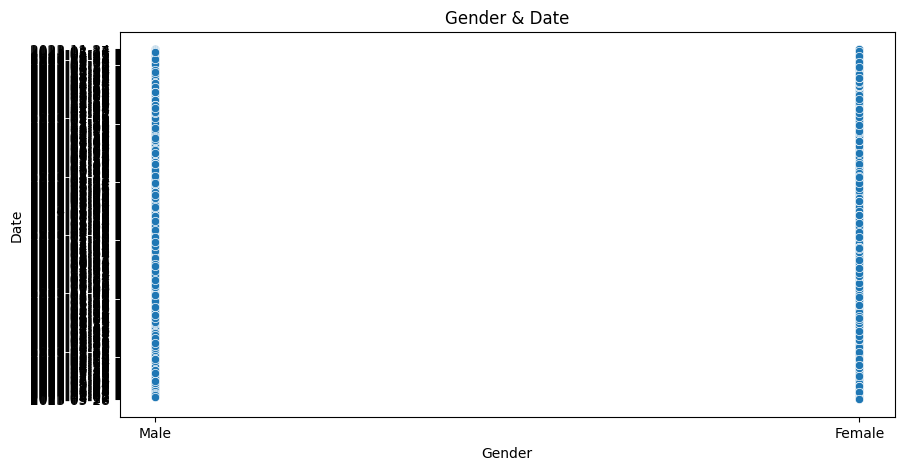

In [23]:
#scatterplot - gender vs date
plt.figure(figsize=(10,5))
sns.scatterplot(x='Gender',y='Date',data=data)
plt.title("Gender & Date")
plt.xlabel("Gender")
plt.ylabel("Date")
plt.show()

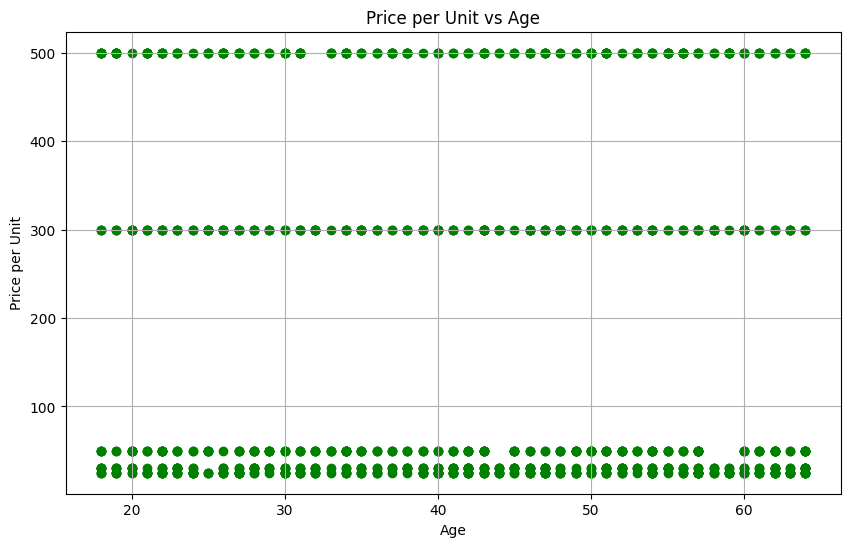

In [24]:
#scatter -  price per unit vs age.
plt.figure(figsize=(10,6))
plt.title("Price per Unit vs Age")
plt.xlabel("Age")
plt.ylabel("Price per Unit")
plt.scatter(data['Age'],data["Price per Unit"],color='green')
plt.grid()

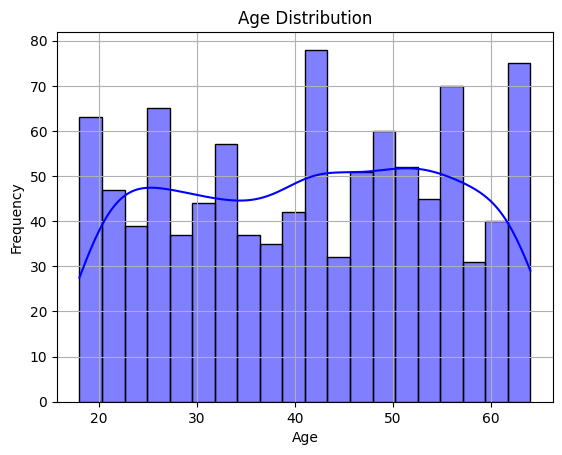

In [25]:
#histplot -  age frequency
sns.histplot(data['Age'],kde=True,bins=20,color='blue')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.grid()

<Axes: xlabel='Gender', ylabel='Age'>

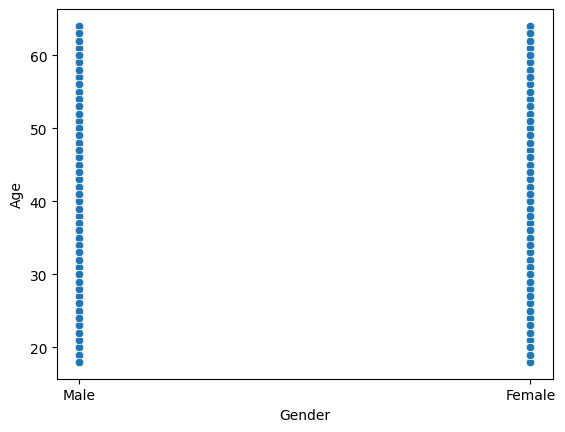

In [26]:
#scatter plot - gender vs age
sns.scatterplot(x='Gender',y="Age",data=data)

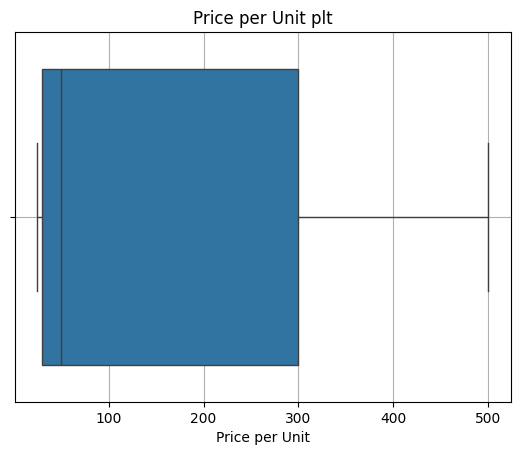

In [27]:
#boxplot - priceper unit
sns.boxplot(x='Price per Unit',data=data)
plt.title("Price per Unit plt")
plt.grid()

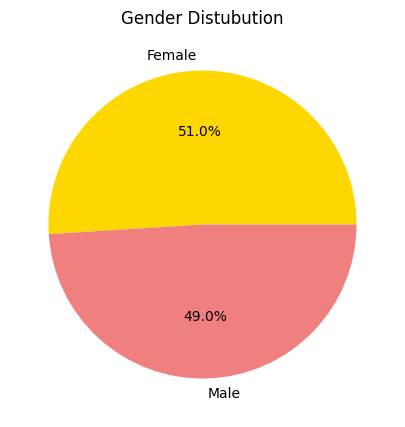

In [34]:
#piechat-Gender(%)
Gender=data["Gender"].value_counts()
plt.figure(figsize=(10,5))
col=['gold','lightcoral']
#use autopact to display the percent value.
plt.pie(Gender,labels=Gender.index,colors=col,autopct='%1.1f%%')
plt.title("Gender Distubution")
plt.show()